In [1]:
import pandas as pd

In [320]:
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

%matplotlib inline

In [322]:
pip install squarify

Note: you may need to restart the kernel to use updated packages.


In [323]:
import squarify

# 1) Data Cleaning & Exploring

In [583]:
df=pd.read_csv('station_data_dataverse.csv')

In [3]:
df.head()

,sessionId,kwhTotal,dollars,created,ended,startTime,endTime,chargeTimeHrs,weekday,platform,...,managerVehicle,facilityType,Mon,Tues,Wed,Thurs,Fri,Sat,Sun,reportedZip
0,1366563,7.78,0.00,0014-11-18 15:40:26,0014-11-18 17:11:04,15,17,1.510556,Tue,android,...,0,3,0,1,0,0,0,0,0,0
1,3075723,9.74,0.00,0014-11-19 17:40:26,0014-11-19 19:51:04,17,19,2.177222,Wed,android,...,0,3,0,0,1,0,0,0,0,0
2,4228788,6.76,0.58,0014-11-21 12:05:46,0014-11-21 16:46:04,12,16,4.671667,Fri,android,...,0,3,0,0,0,0,1,0,0,0
3,3173284,6.17,0.00,0014-12-03 19:16:12,0014-12-03 21:02:18,19,21,1.768333,Wed,android,...,0,3,0,0,1,0,0,0,0,0
4,3266500,0.93,0.00,0014-12-11 20:56:11,0014-12-11 21:14:06,20,21,0.298611,Thu,android,...,0,3,0,0,0,1,0,0,0,0


In [7]:
#checking for datatype inconsistancies 
for column in df.columns:
    if df[df[column].notnull()][column].apply(type).value_counts().shape[0] > 1:
        print(column, "has multiple data type")
    else:
        print("the data is consistant")

the data is consistant
the data is consistant
the data is consistant
the data is consistant
the data is consistant
the data is consistant
the data is consistant
the data is consistant
the data is consistant
the data is consistant
the data is consistant
the data is consistant
the data is consistant
the data is consistant
the data is consistant
the data is consistant
the data is consistant
the data is consistant
the data is consistant
the data is consistant
the data is consistant
the data is consistant
the data is consistant
the data is consistant


In [5]:
#check for missing values
df.isna().sum()

sessionId            0
kwhTotal             0
dollars              0
created              0
ended                0
startTime            0
endTime              0
chargeTimeHrs        0
weekday              0
platform             0
distance          1065
userId               0
stationId            0
locationId           0
managerVehicle       0
facilityType         0
Mon                  0
Tues                 0
Wed                  0
Thurs                0
Fri                  0
Sat                  0
Sun                  0
reportedZip          0
dtype: int64

In [8]:
#checking for duplicates
df[df.duplicated(keep = False)]

,sessionId,kwhTotal,dollars,created,ended,startTime,endTime,chargeTimeHrs,weekday,platform,...,managerVehicle,facilityType,Mon,Tues,Wed,Thurs,Fri,Sat,Sun,reportedZip


In [9]:
df.dtypes

sessionId           int64
kwhTotal          float64
dollars           float64
created            object
ended              object
startTime           int64
endTime             int64
chargeTimeHrs     float64
weekday            object
platform           object
distance          float64
userId              int64
stationId           int64
locationId          int64
managerVehicle      int64
facilityType        int64
Mon                 int64
Tues                int64
Wed                 int64
Thurs               int64
Fri                 int64
Sat                 int64
Sun                 int64
reportedZip         int64
dtype: object

In [11]:
df.describe()

,sessionId,kwhTotal,dollars,startTime,endTime,chargeTimeHrs,distance,userId,stationId,locationId,managerVehicle,facilityType,Mon,Tues,Wed,Thurs,Fri,Sat,Sun,reportedZip
count,3.395000e+03,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,2330.000000,3.395000e+03,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000
mean,5.487001e+06,5.809629,0.118268,13.743446,16.455965,2.841488,18.652378,5.742395e+07,576789.678056,629934.460677,0.595582,2.428571,0.181443,0.187040,0.210015,0.216495,0.179676,0.018262,0.007069,0.703976
std,2.590657e+06,2.892727,0.492562,3.204370,3.406732,1.507472,11.420571,2.674772e+07,257486.310402,255620.993849,0.490851,0.811204,0.385442,0.390001,0.407379,0.411916,0.383974,0.133918,0.083793,0.456569
min,1.004821e+06,0.000000,0.000000,0.000000,0.000000,0.012500,0.856911,1.042767e+07,129465.000000,125372.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.234666e+06,4.350000,0.000000,11.000000,14.000000,2.110278,5.135871,3.329548e+07,369001.000000,481066.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.451498e+06,6.230000,0.000000,13.000000,16.000000,2.808889,21.023826,4.924181e+07,549414.000000,503205.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,7.746644e+06,6.830000,0.000000,17.000000,20.000000,3.544167,27.285053,8.188052e+07,864630.000000,878393.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.998981e+06,23.680000,7.500000,23.000000,23.000000,55.238056,43.059292,9.834581e+07,995505.000000,978130.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [19]:
df=df.drop('distance', axis=1)

In [21]:
df.columns

Index(['sessionId', 'kwhTotal', 'dollars', 'created', 'ended', 'startTime',
       'endTime', 'chargeTimeHrs', 'weekday', 'platform', 'userId',
       'stationId', 'locationId', 'managerVehicle', 'facilityType', 'Mon',
       'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun', 'reportedZip'],
      dtype='object')

In [22]:
df2=df[['sessionId', 'kwhTotal', 'dollars', 'created', 'ended', 'startTime',
       'endTime', 'chargeTimeHrs', 'weekday', 'platform', 'userId',
       'stationId', 'locationId', 'managerVehicle', 'facilityType', 'reportedZip']]
df2

,sessionId,kwhTotal,dollars,created,ended,startTime,endTime,chargeTimeHrs,weekday,platform,userId,stationId,locationId,managerVehicle,facilityType,reportedZip
0,1366563,7.78,0.00,0014-11-18 15:40:26,0014-11-18 17:11:04,15,17,1.510556,Tue,android,35897499,582873,461655,0,3,0
1,3075723,9.74,0.00,0014-11-19 17:40:26,0014-11-19 19:51:04,17,19,2.177222,Wed,android,35897499,549414,461655,0,3,0
2,4228788,6.76,0.58,0014-11-21 12:05:46,0014-11-21 16:46:04,12,16,4.671667,Fri,android,35897499,129465,461655,0,3,0
3,3173284,6.17,0.00,0014-12-03 19:16:12,0014-12-03 21:02:18,19,21,1.768333,Wed,android,35897499,569889,461655,0,3,0
4,3266500,0.93,0.00,0014-12-11 20:56:11,0014-12-11 21:14:06,20,21,0.298611,Thu,android,35897499,414088,566549,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3390,7021565,6.74,0.00,0015-10-01 16:31:18,0015-10-01 19:59:08,16,19,3.463889,Thu,ios,59574735,884707,648339,0,2,1
3391,3758092,6.86,0.00,0015-10-02 16:28:48,0015-10-02 19:27:05,16,19,2.971389,Fri,ios,59574735,884707,648339,0,2,1
3392,5858374,6.07,0.00,0015-09-30 16:54:22,0015-09-30 20:24:06,16,20,3.495556,Wed,android,32070852,638536,868085,0,3,1
3393,2586645,5.74,0.00,0015-09-24 11:43:02,0015-09-24 13:55:12,11,13,2.202778,Thu,ios,58023207,818217,700367,1,2,1


In [34]:
#checking for outliers

stats = df.describe().transpose()
stats['IQR'] = stats['75%'] - stats['25%']


outliers = pd.DataFrame(columns=df.columns)
outliers
for col in stats.index:
    iqr = stats.at[col,'IQR']
    cutoff = iqr * 1.5
    lower = stats.at[col,'25%'] - cutoff
    upper = stats.at[col,'75%'] + cutoff
    results = df[(df[col] < lower) |
                   (df[col] > upper)].copy()
    results['Outlier'] = col
    outliers = outliers.append(results)
outliers

C:\Users\kaci\AppData\Local\Temp\ipykernel_16656\2359649661.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  outliers = outliers.append(results)
C:\Users\kaci\AppData\Local\Temp\ipykernel_16656\2359649661.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  outliers = outliers.append(results)
C:\Users\kaci\AppData\Local\Temp\ipykernel_16656\2359649661.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  outliers = outliers.append(results)
C:\Users\kaci\AppData\Local\Temp\ipykernel_16656\2359649661.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  outliers = outliers.append(results)
C:\Users\kaci\AppData\Local\Temp\ipykernel_16656

,sessionId,kwhTotal,dollars,created,ended,startTime,endTime,chargeTimeHrs,weekday,platform,...,facilityType,Mon,Tues,Wed,Thurs,Fri,Sat,Sun,reportedZip,Outlier
6,5084244,0.30,0.0,0014-12-12 15:08:40,0014-12-12 15:47:04,15,15,0.640000,Fri,android,...,3,0,0,0,0,1,0,0,0,kwhTotal
13,1853945,0.00,0.0,0015-01-09 13:59:09,0015-01-09 14:21:03,13,14,0.365000,Fri,android,...,3,0,0,0,0,1,0,0,0,kwhTotal
19,7934936,0.09,0.0,0015-01-30 18:47:08,0015-01-30 18:49:04,18,18,0.032222,Fri,android,...,3,0,0,0,0,1,0,0,0,kwhTotal
20,7073357,12.14,0.0,0015-01-30 19:50:01,0015-01-30 21:58:04,19,21,2.134167,Fri,android,...,3,0,0,0,0,1,0,0,0,kwhTotal
21,3002716,11.74,0.0,0015-02-03 18:59:54,0015-02-03 21:53:04,18,21,2.886111,Tue,android,...,3,0,1,0,0,0,0,0,0,kwhTotal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1835,5731348,2.88,0.0,0015-08-02 17:21:42,0015-08-02 18:17:05,17,18,0.923056,Sun,ios,...,1,0,0,0,0,0,0,1,1,Sun
1857,8474006,3.51,0.0,0015-09-27 12:30:45,0015-09-27 14:57:05,12,14,2.438889,Sun,ios,...,1,0,0,0,0,0,0,1,1,Sun
1858,9266328,2.30,0.0,0015-09-27 17:33:18,0015-09-27 18:17:06,17,18,0.730000,Sun,ios,...,1,0,0,0,0,0,0,1,1,Sun
1868,2518203,6.55,0.0,0015-10-04 12:44:59,0015-10-04 15:54:06,12,15,3.151944,Sun,ios,...,1,0,0,0,0,0,0,1,1,Sun


In [35]:
outliers['Outlier'].value_counts()

Thurs            735
Wed              713
Tues             635
Mon              616
Fri              610
dollars          379
kwhTotal         261
Sat               62
chargeTimeHrs     59
Sun               24
endTime           21
startTime          6
Name: Outlier, dtype: int64

In [43]:
outliers_delete=outliers[outliers.Outlier == 'chargeTimeHrs']

In [44]:
outliers_delete

,sessionId,kwhTotal,dollars,created,ended,startTime,endTime,chargeTimeHrs,weekday,platform,...,facilityType,Mon,Tues,Wed,Thurs,Fri,Sat,Sun,reportedZip,Outlier
173,2162299,4.10,0.83,0015-01-26 18:09:47,0015-01-29 01:24:04,18,1,55.238056,Mon,ios,...,4,1,0,0,0,0,0,0,0,chargeTimeHrs
190,5923518,6.30,1.67,0015-03-13 16:07:08,0015-03-13 21:49:05,16,21,5.699167,Fri,ios,...,2,0,0,0,0,1,0,0,0,chargeTimeHrs
213,6295415,6.28,2.42,0015-05-18 15:41:11,0015-05-18 22:07:05,15,22,6.431667,Mon,ios,...,4,1,0,0,0,0,0,0,0,chargeTimeHrs
219,4150137,6.37,2.00,0015-06-02 15:55:00,0015-06-02 21:46:04,15,21,5.851111,Tue,ios,...,2,0,1,0,0,0,0,0,0,chargeTimeHrs
244,3320247,6.73,1.67,0015-07-15 16:16:00,0015-07-15 21:59:05,16,21,5.718056,Wed,ios,...,2,0,0,1,0,0,0,0,0,chargeTimeHrs
248,7817859,7.84,2.00,0015-07-21 15:58:37,0015-07-21 21:54:06,15,21,5.924722,Tue,ios,...,2,0,1,0,0,0,0,0,0,chargeTimeHrs
274,2095458,5.09,2.00,0015-08-21 15:25:57,0015-08-21 21:29:06,15,21,6.052500,Fri,ios,...,2,0,0,0,0,1,0,0,0,chargeTimeHrs
293,1466557,5.46,4.58,0015-09-09 13:17:32,0015-09-09 21:57:07,13,21,8.659722,Wed,ios,...,2,0,0,1,0,0,0,0,0,chargeTimeHrs
303,6962786,6.17,4.83,0015-09-21 13:16:24,0015-09-21 22:07:08,13,22,8.845556,Mon,ios,...,2,1,0,0,0,0,0,0,0,chargeTimeHrs
342,8630811,6.47,5.75,0015-03-11 16:01:55,0015-03-11 22:38:05,16,22,6.602778,Wed,android,...,3,0,0,1,0,0,0,0,0,chargeTimeHrs


In [45]:
df

,sessionId,kwhTotal,dollars,created,ended,startTime,endTime,chargeTimeHrs,weekday,platform,...,managerVehicle,facilityType,Mon,Tues,Wed,Thurs,Fri,Sat,Sun,reportedZip
0,1366563,7.78,0.00,0014-11-18 15:40:26,0014-11-18 17:11:04,15,17,1.510556,Tue,android,...,0,3,0,1,0,0,0,0,0,0
1,3075723,9.74,0.00,0014-11-19 17:40:26,0014-11-19 19:51:04,17,19,2.177222,Wed,android,...,0,3,0,0,1,0,0,0,0,0
2,4228788,6.76,0.58,0014-11-21 12:05:46,0014-11-21 16:46:04,12,16,4.671667,Fri,android,...,0,3,0,0,0,0,1,0,0,0
3,3173284,6.17,0.00,0014-12-03 19:16:12,0014-12-03 21:02:18,19,21,1.768333,Wed,android,...,0,3,0,0,1,0,0,0,0,0
4,3266500,0.93,0.00,0014-12-11 20:56:11,0014-12-11 21:14:06,20,21,0.298611,Thu,android,...,0,3,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3390,7021565,6.74,0.00,0015-10-01 16:31:18,0015-10-01 19:59:08,16,19,3.463889,Thu,ios,...,0,2,0,0,0,1,0,0,0,1
3391,3758092,6.86,0.00,0015-10-02 16:28:48,0015-10-02 19:27:05,16,19,2.971389,Fri,ios,...,0,2,0,0,0,0,1,0,0,1
3392,5858374,6.07,0.00,0015-09-30 16:54:22,0015-09-30 20:24:06,16,20,3.495556,Wed,android,...,0,3,0,0,1,0,0,0,0,1
3393,2586645,5.74,0.00,0015-09-24 11:43:02,0015-09-24 13:55:12,11,13,2.202778,Thu,ios,...,1,2,0,0,0,1,0,0,0,1


In [ ]:
#drop the chargetimeHRs outliers rows 

In [64]:
df=df[~df.loc[:,'sessionId'].isin(outliers_delete["sessionId"])]

In [52]:
df

,sessionId,kwhTotal,dollars,created,ended,startTime,endTime,chargeTimeHrs,weekday,platform,...,managerVehicle,facilityType,Mon,Tues,Wed,Thurs,Fri,Sat,Sun,reportedZip
0,1366563,7.78,0.00,0014-11-18 15:40:26,0014-11-18 17:11:04,15,17,1.510556,Tue,android,...,0,3,0,1,0,0,0,0,0,0
1,3075723,9.74,0.00,0014-11-19 17:40:26,0014-11-19 19:51:04,17,19,2.177222,Wed,android,...,0,3,0,0,1,0,0,0,0,0
2,4228788,6.76,0.58,0014-11-21 12:05:46,0014-11-21 16:46:04,12,16,4.671667,Fri,android,...,0,3,0,0,0,0,1,0,0,0
3,3173284,6.17,0.00,0014-12-03 19:16:12,0014-12-03 21:02:18,19,21,1.768333,Wed,android,...,0,3,0,0,1,0,0,0,0,0
4,3266500,0.93,0.00,0014-12-11 20:56:11,0014-12-11 21:14:06,20,21,0.298611,Thu,android,...,0,3,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3390,7021565,6.74,0.00,0015-10-01 16:31:18,0015-10-01 19:59:08,16,19,3.463889,Thu,ios,...,0,2,0,0,0,1,0,0,0,1
3391,3758092,6.86,0.00,0015-10-02 16:28:48,0015-10-02 19:27:05,16,19,2.971389,Fri,ios,...,0,2,0,0,0,0,1,0,0,1
3392,5858374,6.07,0.00,0015-09-30 16:54:22,0015-09-30 20:24:06,16,20,3.495556,Wed,android,...,0,3,0,0,1,0,0,0,0,1
3393,2586645,5.74,0.00,0015-09-24 11:43:02,0015-09-24 13:55:12,11,13,2.202778,Thu,ios,...,1,2,0,0,0,1,0,0,0,1


In [ ]:
#cleaned data

In [53]:
df.to_csv("cleaned_data.csv", index = False)

In [54]:
len(df["locationId"].unique())

25

In [56]:
len(df["userId"].unique())

85

In [58]:
len(df["stationId"].unique())

105

In [60]:
#to check if there is one only value in managerVehicle per userId
df.groupby(["userId","managerVehicle"]).count()

,,sessionId,kwhTotal,dollars,created,ended,startTime,endTime,chargeTimeHrs,weekday,platform,...,locationId,facilityType,Mon,Tues,Wed,Thurs,Fri,Sat,Sun,reportedZip
userId,managerVehicle,,,,,,,,,,,,,,,,,,,,,
10427670,1,11,11,11,11,11,11,11,11,11,11,...,11,11,11,11,11,11,11,11,11,11
10909503,1,71,71,71,71,71,71,71,71,71,71,...,71,71,71,71,71,71,71,71,71,71
11299464,1,27,27,27,27,27,27,27,27,27,27,...,27,27,27,27,27,27,27,27,27,27
13066218,1,35,35,35,35,35,35,35,35,35,35,...,35,35,35,35,35,35,35,35,35,35
14260257,0,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94947534,1,42,42,42,42,42,42,42,42,42,42,...,42,42,42,42,42,42,42,42,42,42
95411349,1,18,18,18,18,18,18,18,18,18,18,...,18,18,18,18,18,18,18,18,18,18
95980995,0,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2


# 2) Visualisation

- This shows the difference of distribution of the charge time with and without the outliers

Text(0.5, 1.0, 'With no outliers')

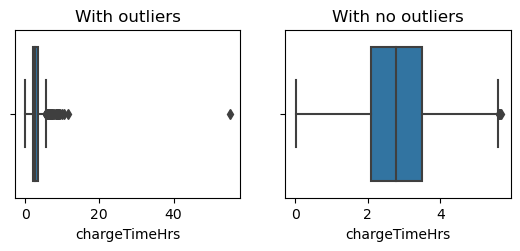

In [600]:
plt.subplot(2, 2, 1) #one line and 2 columns, start with which

fig1=sns.boxplot(x="chargeTimeHrs",data=df)
fig1.set_title("With outliers")

plt.subplot(2, 2, 2)
fig1=sns.boxplot(x="chargeTimeHrs",data=dfc)
fig1.set_title("With no outliers")

## Analysis of the charge time
- Distribution of the charge time
- Average time of charge per day in the week ( periodicity of charges in a week)
- Rush hours of charging per day in the week ( periodicity of charges in a week) 

In [77]:
dfc.chargeTimeHrs.max()

5.661666667

Text(0, 0.5, 'frequency')

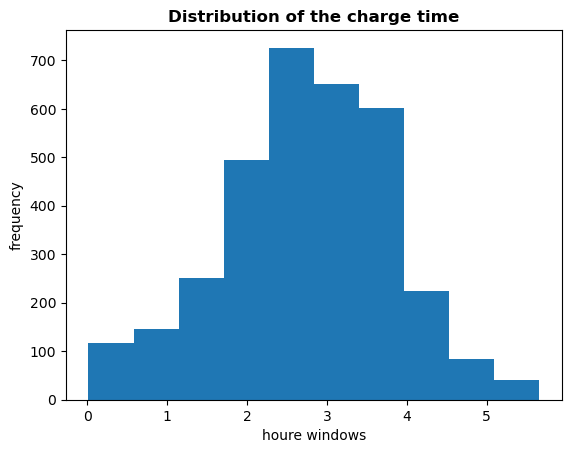

In [98]:
#distribution of the charge time

plt.hist(dfc.chargeTimeHrs)
plt.title('Distribution of the charge time', fontweight='bold')
plt.xlabel('houre windows')
plt.ylabel('frequency')

Text(0, 0.5, 'average hours')

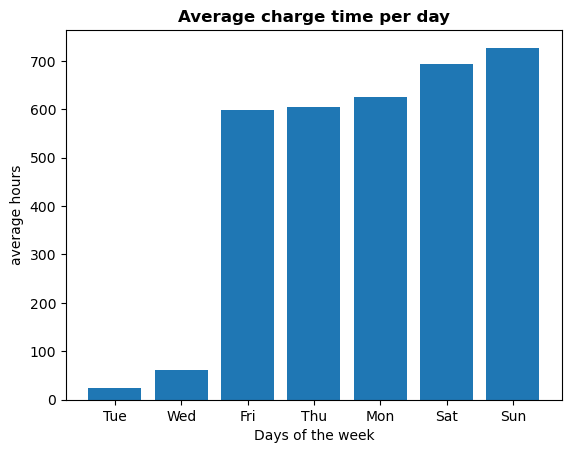

In [105]:
#Average time of charge per day in the week histogram ( periodicity of charges in a week)

#sort 


plt.bar(dfc['weekday'].unique(),dfc.groupby('weekday')['chargeTimeHrs'].count().sort_values())

plt.title('Average charge time per day', fontweight='bold')
plt.xlabel('Days of the week')
plt.ylabel('average hours')

In [159]:
#Rush hours of charging per day in the week multiple series lines ( periodicity of charges in a week) 

In [163]:
dfc.groupby('startTime').count()[dfc['weekday']=='Mon']

C:\Users\kaci\AppData\Local\Temp\ipykernel_16656\2345208117.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dfc.groupby('startTime').count()[dfc['weekday']=='Mon']


,sessionId,kwhTotal,dollars,created,ended,endTime,chargeTimeHrs,weekday,platform,userId,...,managerVehicle,facilityType,Mon,Tues,Wed,Thurs,Fri,Sat,Sun,reportedZip
startTime,,,,,,,,,,,,,,,,,,,,,
14,137,137,137,137,137,137,137,137,137,137,...,137,137,137,137,137,137,137,137,137,137
23,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2


In [184]:
dfc.groupby(['weekday','startTime']).max()

sessionId  kwhTotal  dollars              created  \
weekday startTime                                                      
Fri     8            7983098      6.82     1.42  0015-09-11 08:59:33   
        9            9176845      6.85     0.00  0015-10-02 09:58:55   
        10           9990811     16.94     0.50  0015-10-02 10:50:44   
        11           9862325     15.89     1.08  0015-10-02 11:57:26   
        12           9810654     17.98     1.50  0015-10-02 12:32:58   
...                      ...       ...      ...                  ...   
Wed     18           9866287     21.16     1.25  0015-09-23 18:48:57   
        19           9792988     17.90     0.00  0015-09-30 19:56:07   
        20           9855221     14.83     0.00  0015-09-30 20:10:22   
        21           9725689     15.06     0.00  0015-09-09 21:14:43   
        22           3652619     13.23     0.00  0015-07-29 22:23:34   

                                 ended  endTime  chargeTimeHrs platform  \
weekday startTime                                                         
Fri     8          0015-09-11 11:46:06       14       5.466667      ios   
        9          0015-10-02 13:23:07       13       3.403333      ios   
        10         0015-10-02 13:54:08       15       4.172778      ios   
        11         0015-10-02 15:49:06       17       5.520556      ios   
        12         0015-10-02 16:40:09       18       5.571389      ios   
...                                ...      ...            ...      ...   
Wed     18         0015-09-23 22:06:12       23       4.057222      ios   
        19         0015-09-30 22:12:07       23       3.881667      ios   
        20         0015-09-30 21:26:06       23       3.360278      ios   
        21         0015-09-09 22:18:05       23       3.534722      ios   
        22         0015-07-30 00:57:06       22       2.766389      ios   

                     userId  stationId  ...  managerVehicle  facilityType  \
weekday startTime                       ...                                 
Fri     8          98345808     369001  ...               1             2   
        9          98345808     955429  ...               1             2   
        10         90546786     995505  ...               1             3   
        11         95980995     955429  ...               1             4   
        12         98345808     995505  ...               1             3   
...                     ...        ...  ...             ...           ...   
Wed     18         98345808     995505  ...               1             3   
        19         95411349     988981  ...               1             4   
        20         82888443     987396  ...               1             4   
        21         82888443     987396  ...               1             3   
        22         82888443     987396  ...               1             3   

                   Mon  Tues  Wed  Thurs  Fri  Sat  Sun  reportedZip  
weekday startTime                                                     
Fri     8            0     0    0      0    1    0    0            1  
        9            0     0    0      0    1    0    0            1  
        10           0     0    0      0    1    0    0            1  
        11           0     0    0      0    1    0    0            1  
        12           0     0    0      0    1    0    0            1  
...                ...   ...  ...    ...  ...  ...  ...          ...  
Wed     18           0     0    1      0    0    0    0            1  
        19           0     0    1      0    0    0    0            1  
        20           0     0    1      0    0    0    0            1  
        21           0     0    1      0    0    0    0            1  
        22           0     0    1      0    0    0    0            1  

[105 rows x 21 columns]

Text(0.5, 1.0, 'Periodicity of charging hours in a week')

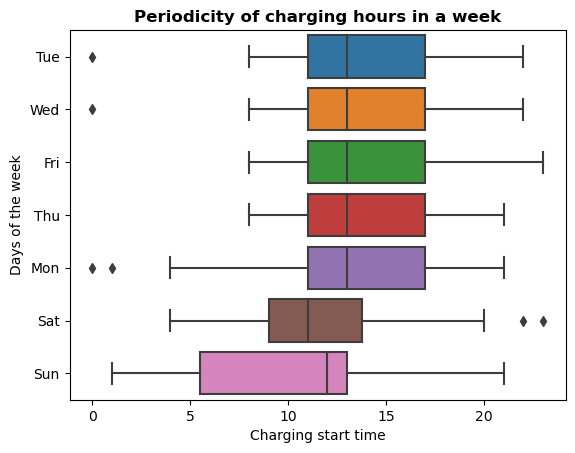

In [538]:
plot0=sns.boxplot(data=dfc, x="startTime", y = "weekday")
plot0.set(xlabel='Charging start time', ylabel='Days of the week')
plot0.set_title('Periodicity of charging hours in a week', fontweight='bold' )

In [156]:
dfc.groupby('weekday')['startTime']

## Analysis of the effect of the managerial status on chargings

- Number of charging sessions per user grouping by manager status
- Average charge time according to the manager status
- Average kwh consumed between managers and non managers
- Number of charging sessions per day and managerial status (radar chart)

In [515]:
test0=dfc.groupby(['managerVehicle','userId'])['sessionId'].count()

In [516]:
test0=test0.reset_index(0)

In [532]:
test0

,managerVehicle,sessionId
userId,,
14260257,0,3
17969193,0,1
19555569,0,56
25628328,0,1
26098875,0,1
...,...,...
93202560,1,38
94947534,1,42
95411349,1,18


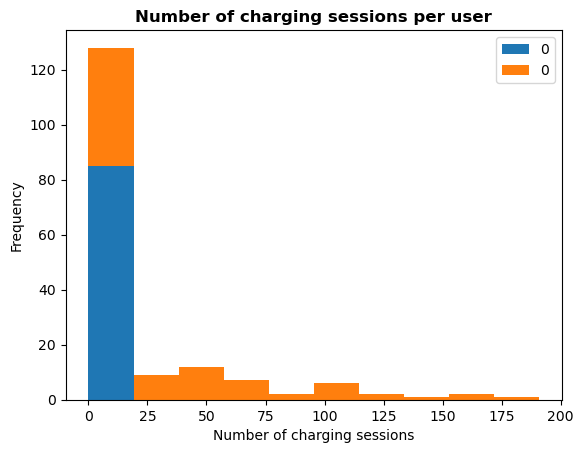

In [533]:
#Number of charging sessions per user grouping by manager status : stacked bar chart PLT


# plt.barh(test0.index, test0[0])
# plt.barh(test0.index, test0[1], left = test0[0], label="Manager", color = "red")

plt.hist(test0, histtype='bar', stacked=True, label=test0['managerVehicle'])

plt.title('Number of charging sessions per user', fontweight='bold')
plt.xlabel('Number of charging sessions')
plt.ylabel('Frequency')
plt.legend()




#try to stack bar

In [247]:
dfc.groupby('managerVehicle').mean()['chargeTimeHrs']

managerVehicle
0    2.609065
1    2.849272
Name: chargeTimeHrs, dtype: float64

[Text(0.5, 0, 'Not Manager (0) vs Manager (1)'),
 Text(0, 0.5, 'Charge time'),
 Text(0.5, 1.0, 'Average charge time by status')]

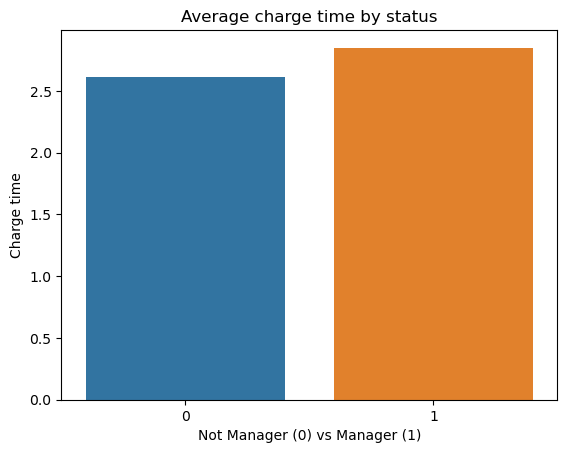

In [258]:
#Average time of charge according the manager status bar chart SNS

plot1=sns.barplot(x = dfc['managerVehicle'].unique(), y = dfc.groupby('managerVehicle').mean()['chargeTimeHrs'])
plot1.set(xlabel ="Not Manager (0) vs Manager (1)", ylabel = "Charge time", title ='Average charge time by status')

In [240]:
dfc['chargeTimeHrs'].mean()

2.751777577935852

[Text(0.5, 0, 'Not Manager (0) vs Manager (1)'),
 Text(0, 0.5, 'kwh consumed'),
 Text(0.5, 1.0, 'Average kwh consumed by manager vehicles and non-manager vehicles')]

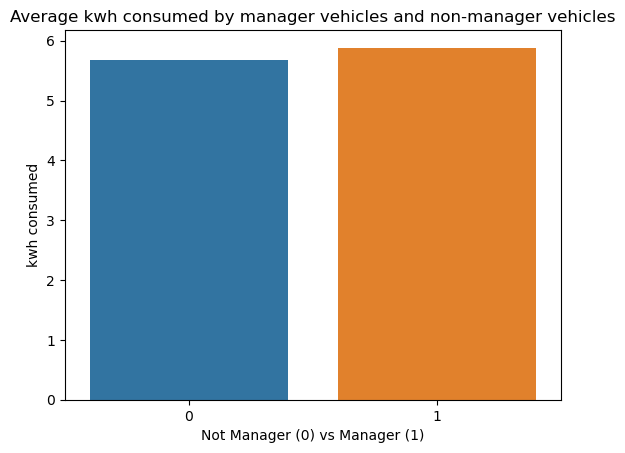

In [265]:
#Average kwhTotal between managerVehicle and non managerVehicle bar chart SNS

plot2=sns.barplot(x = dfc['managerVehicle'].unique(), y = dfc.groupby('managerVehicle').mean()['kwhTotal'])
plot2.set(xlabel ="Not Manager (0) vs Manager (1)", ylabel = "kwh consumed", title ='Average kwh consumed by manager vehicles and non-manager vehicles')

In [ ]:
#Number of daily average charges, grouped by manager status radar chart PLT

df = pd.DataFrame(dict(
    r=[1, 5, 2, 2, 3],
    theta=['processing cost','mechanical properties','chemical stability',
           'thermal stability', 'device integration']))
fig = px.line_polar(df, r='r', theta='theta', line_close=True)
fig.show()

In [586]:
test2=dfc.groupby(['managerVehicle','weekday']).mean()[['kwhTotal', 'dollars', 'chargeTimeHrs']]
test2=test2.reset_index(0)

In [549]:
df0=dfc[(dfc['managerVehicle'] == 0)]
df1=dfc[(dfc['managerVehicle'] == 1)]
df1[['sessionId', 'kwhTotal', 'dollars', 'chargeTimeHrs']]
dfx=dfc[['sessionId', 'kwhTotal', 'dollars', 'chargeTimeHrs']]
df0_=df0[['sessionId', 'kwhTotal', 'dollars', 'chargeTimeHrs']]
df1_=df1[['sessionId', 'kwhTotal', 'dollars', 'chargeTimeHrs']]

In [566]:
dfc[(dfc['managerVehicle'] == 1)&(dfc['weekday'] == 'Sun')]['sessionId'].count()

4

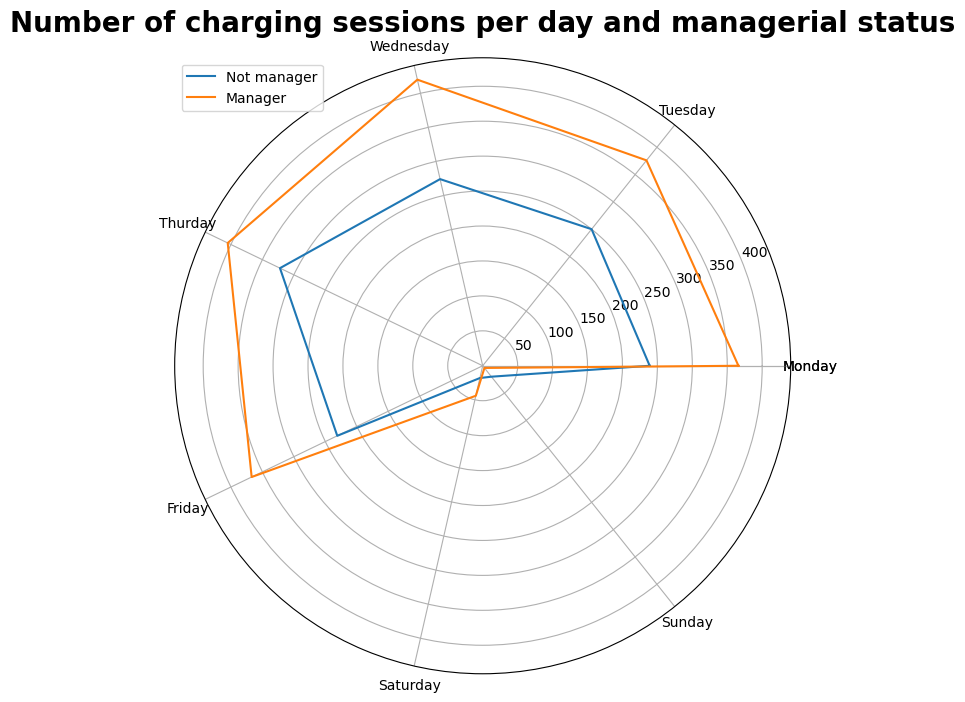

In [579]:
# radar chart

manager0=[239, 250, 274, 322, 231, 18, 20]
manager1=[366, 376, 420, 405, 367, 44, 4]
manager0 = [*manager0, manager0[0]]
manager1 = [*manager1, manager1[0]]

categories = ['Monday', 'Tuesday', 'Wednesday', 'Thurday', 'Friday', 'Saturday', 'Sunday']
categories = [*categories, categories[0]]

# calculate max and min for each dimension

# sessionId_max=dfc.sessionId.max()
# sessionId_min=dfc.sessionId.min()
# kwhTotal_max=dfc.kwhTotal.max()
# kwhTotal_min=dfc.kwhTotal.min()
# dollars_max=dfc.dollars.max()
# dollars_min=dfc.dollars.min()
# chargeTimeHrs_max=dfc.chargeTimeHrs.max()
# chargeTimeHrs_max=dfc.chargeTimeHrs.max()



label_loc = np.linspace(start=0, stop=2 * np.pi, num=len(manager0))

plt.figure(figsize=(8, 8))
plt.subplot(polar=True)
plt.plot(label_loc, manager0, label='Not manager')
plt.plot(label_loc, manager1, label='Manager')
plt.title('Number of charging sessions per day and managerial status', size=20, fontweight='bold')
lines, labels = plt.thetagrids(np.degrees(label_loc), labels=categories)
plt.legend(loc="upper left")
plt.show()

## Analysis of the location ID 
- Nb of charging sessions per location 
- Average charge time per location
- Distribution of the amounts paid by users
- Kwh consumed according to managerial status and facility type throughout the week

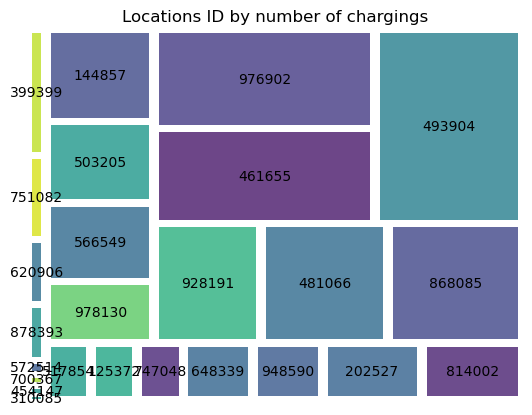

In [330]:
#Nb of charging sessions per location Treemap PLT
nb_chargings=dfc['sessionId'].groupby(dfc['locationId']).count().sort_values()

squarify.plot(sizes=nb_chargings, label=nb_chargings.index, alpha=.8 , pad=2)
plt.axis('off')
plt.title("Locations ID by number of chargings")
plt.show()

C:\Users\kaci\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 0, 'Charge time (hours)'),
 Text(0, 0.5, 'Occurrence'),
 Text(0.5, 1.0, 'Average charge time per location')]

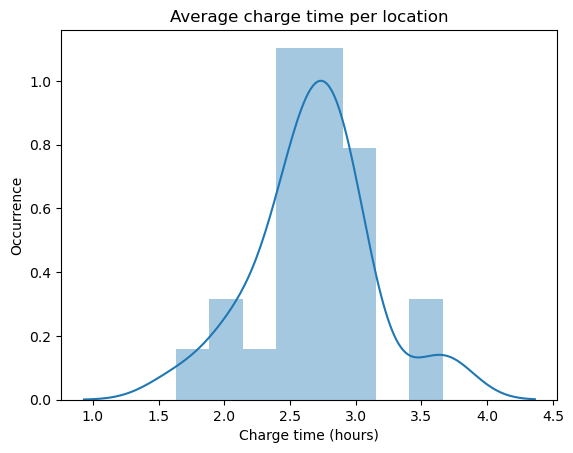

In [413]:
#Average charge time per location bar chart SNS

# dfc['chargeTimeHrs'].groupby(dfc['locationId']).mean()

plot3=
(dfc['chargeTimeHrs'].groupby(dfc['locationId']).mean())

plot3.set(xlabel ="Charge time (hours)", ylabel = "Occurrence", title ='Average charge time per location')

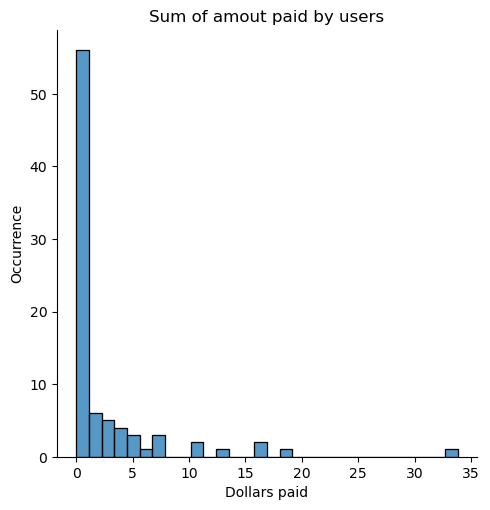

In [537]:
#distribution of the amounts paid by users ?

plot3_5=sns.displot(dfc['dollars'].groupby(dfc['userId']).sum())
plot3_5.set(xlabel ="Dollars paid", ylabel = "Occurrence", title ='Sum of amout paid by users')


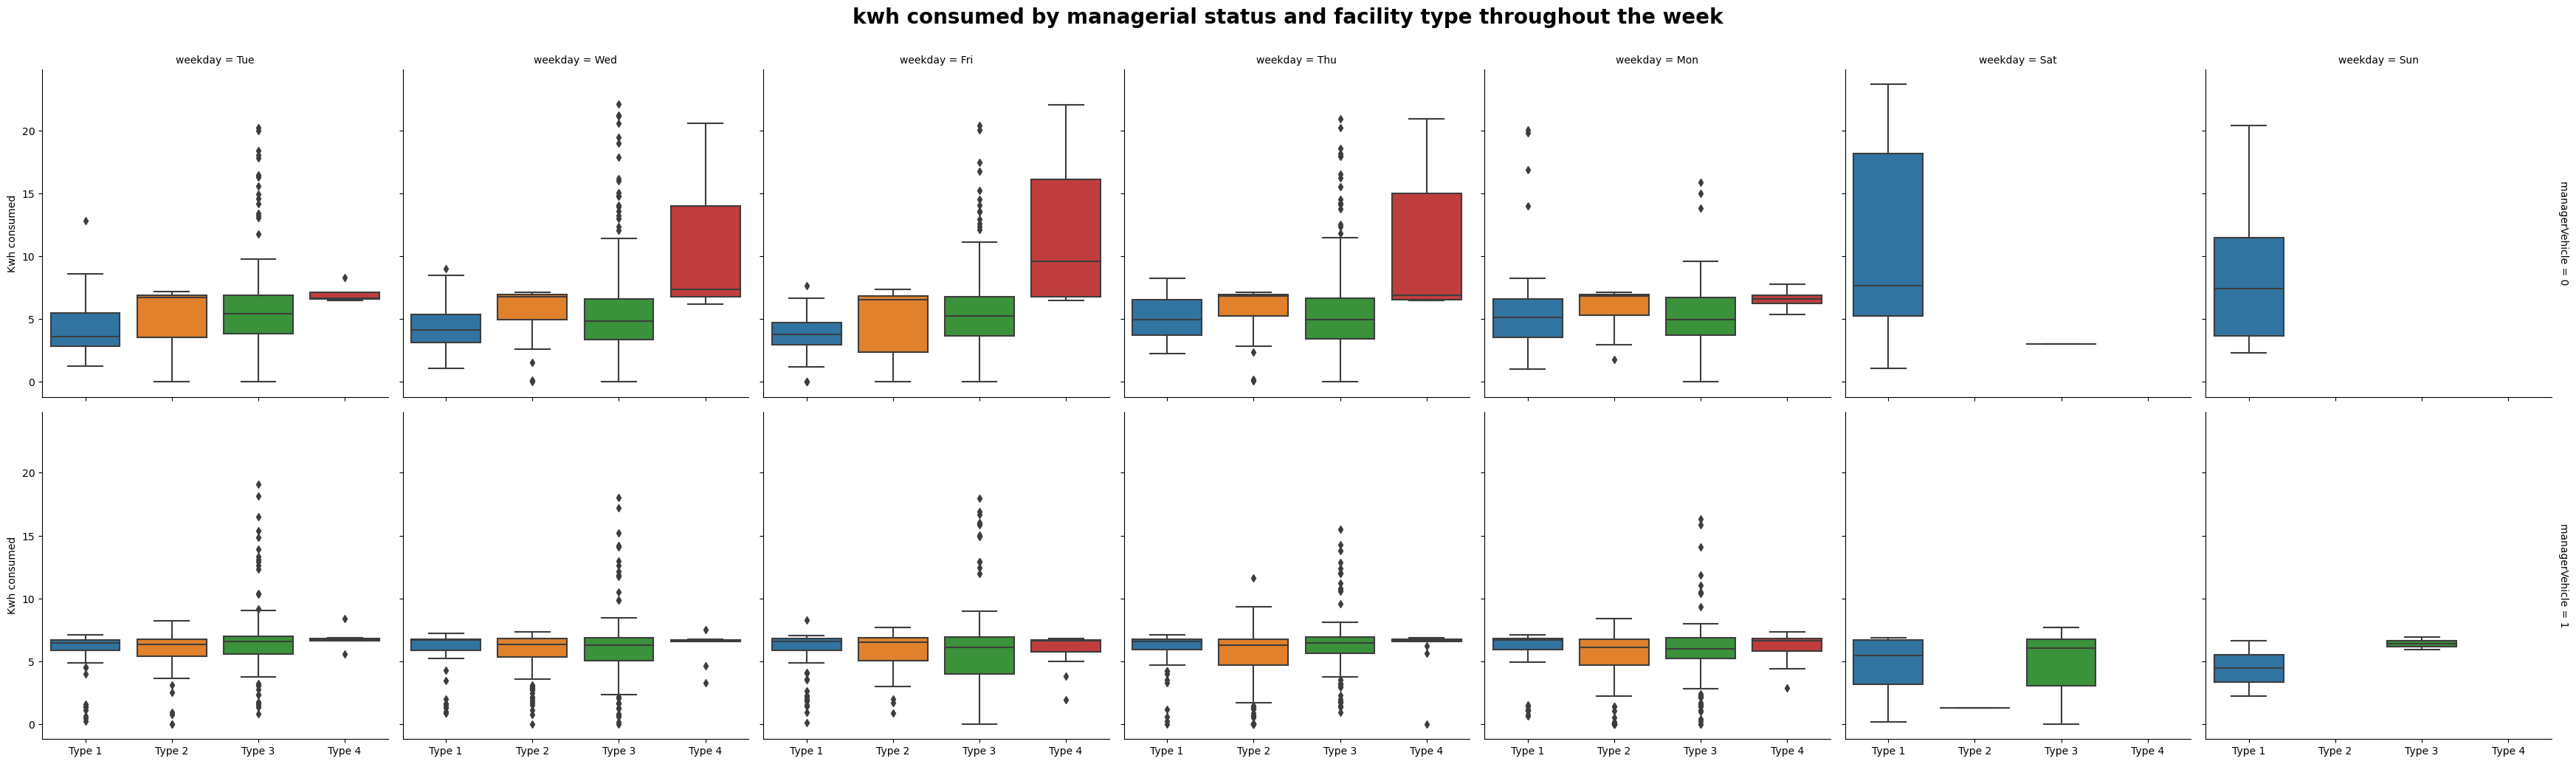

In [534]:
#kwh consumed by managerial status and facility type throughout the week
plot4=sns.catplot(x='facilityType', y = 'kwhTotal', data = dfc, col='weekday', row='managerVehicle', kind="box", margin_titles = True)

plot4.fig.suptitle('kwh consumed by managerial status and facility type throughout the week', size='20', fontweight='bold', y = 1.05)

plot4.set_xticklabels(['Type 1', 'Type 2', 'Type 3', 'Type 4'])
plot4.set_ylabels('Kwh consumed')
plot4.set_xlabels('')